In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Load the dataset
data = pd.read_csv('linkedin-reviews.csv')

In [6]:
data.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


The dataset contains two columns: Review and Rating. The Review column consists of textual reviews, and the Rating column contains corresponding numerical ratings.

In [7]:
#let s have a look at column information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# Exploratory Data Analysis

Now, let’s explore this data step by step. We’ll start by analyzing the distribution of ratings. It will provide insight into the overall sentiment of the reviews. Then, we can explore further, such as analyzing the length of reviews, and possibly derive insights from the text of the reviews.
Let’s begin with the distribution of ratings:

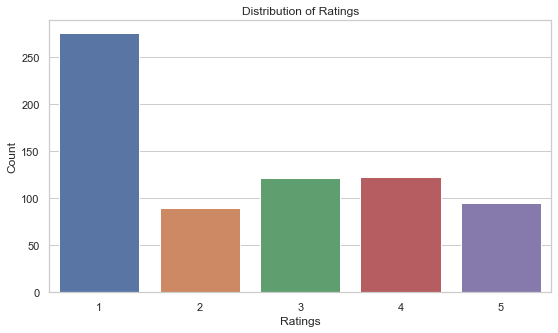

In [9]:
#ploting the distribution of the ratings
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data=data,x= 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

Here’s the distribution of ratings from the LinkedIn reviews dataset. As you can see, it gives a clear picture of how many reviews fall into each rating category (from 1 to 5).

Next, we’ll analyze the length of the reviews, as this can sometimes correlate with the sentiment or detail of feedback. We will first calculate the length of each review and then visualize the data:

In [10]:
#Calculate  the length of each review
data["Review Length"]= data['Review'].apply(len)

In [11]:
data.head()

,Review,Rating,Review Length
0,Does absolutely nothing for a LinkedIn beginne...,1,80
1,Force close(galaxy tab),1,23
2,Slow and it tries to upload your contacts with...,1,61
3,Add ability to customize the profile and move ...,4,90
4,"Good app, but it's a pain that it's not possib...",4,133


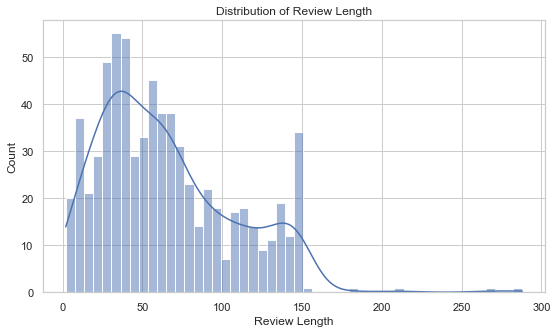

In [12]:
#plot the distribution of review length
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.histplot(data['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()


# Adding Sentiment Labels in the Data

Now, the next step is to label the data with sentiments. We can use Textblob for this task. TextBlob provides a polarity score ranging from -1 (very negative) to 1 (very positive) for a given text. We can use this score to classify each review’s sentiment as positive, neutral, or negative.

Let’s proceed to label the dataset using TextBlob for sentiment analysis:

In [16]:
from textblob import TextBlob

In [17]:
def textblob_analysis(review):
    #analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    #Classifying the polarity of the sentiment
    if sentiment.polarity > 0.1:
        return "Positive"
    elif sentiment.polarity< -0.1:
        return "Negative"
    else:
        return "Neutral"

In [18]:
#applying TextBlob sentiment analysis to the reviews
data['Sentiment']= data["Review"].apply(textblob_analysis)

In [19]:
data.head()

,Review,Rating,Review Length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive


In [20]:
sentiment_dist= data['Sentiment'].value_counts()

In [21]:
sentiment_dist

Positive    298
Neutral     297
Negative    107
Name: Sentiment, dtype: int64

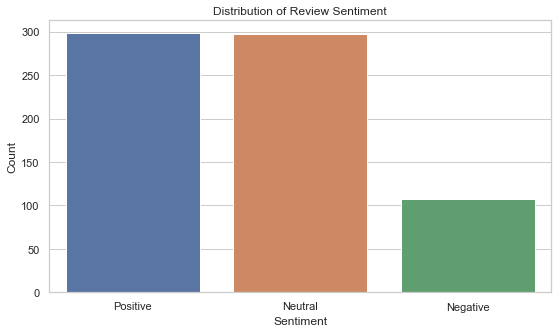

In [22]:
#let's visualize the distibuton of review sentiment
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.barplot(x=sentiment_dist.index, y=sentiment_dist.values)
plt.title('Distribution of Review Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

So, we can see although the app has low ratings, still the reviewers don’t use many negative words in the reviews for the app.

Next, we’ll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and the numerical rating. For this task, we can see how sentiments are distributed across different rating levels:

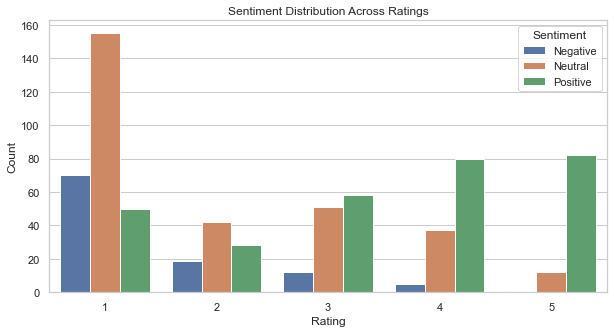

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

Now, let’s perform a text analysis to identify common words or themes within each sentiment category. It involves examining the most frequently occurring words in positive, negative, and neutral reviews using a word cloud:

In [34]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [35]:
from wordcloud import WordCloud

In [40]:
# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in data[data['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()



In [ ]:
# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)